In [1]:
#importing required library for EDA
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, boxcox
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
byk=pd.read_csv('bike sharing_hourbasis.csv')
byk

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
byk.shape

(17379, 17)

In [4]:
#getting back the original values

byk['dteday']=byk['dteday'].astype('datetime64[D]')
byk['temp']=(byk['temp']*41).round(3)
byk['atemp']=(byk['atemp']*50).round(3)
byk['hum']=(byk['hum']*100).round(3)
byk['windspeed']=(byk['windspeed']*67).round(3)


In [5]:
#generating few more columns
byk['yr']=byk['dteday'].dt.year 

byk['holiday']=byk['dteday'].dt.day_name()

In [6]:
#renameing col holiday
byk.rename(columns={'holiday':'Day'},inplace=True)

In [7]:
#inserting a new col named day_type
data=np.where((byk["Day"]=="Sunday")|(byk["Day"]=="Saturday"),"weekend","weeekday")
byk.insert(7,'Day_type',data)

In [8]:
byk
#the final dataset after all alteration

,instant,dteday,season,yr,mnth,hr,Day,Day_type,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,Saturday,weekend,6,0,1,9.84,14.395,81.0,0.000,3,13,16
1,2,2011-01-01,1,2011,1,1,Saturday,weekend,6,0,1,9.02,13.635,80.0,0.000,8,32,40
2,3,2011-01-01,1,2011,1,2,Saturday,weekend,6,0,1,9.02,13.635,80.0,0.000,5,27,32
3,4,2011-01-01,1,2011,1,3,Saturday,weekend,6,0,1,9.84,14.395,75.0,0.000,3,10,13
4,5,2011-01-01,1,2011,1,4,Saturday,weekend,6,0,1,9.84,14.395,75.0,0.000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,2012,12,19,Monday,weeekday,1,1,2,10.66,12.880,60.0,11.001,11,108,119
17375,17376,2012-12-31,1,2012,12,20,Monday,weeekday,1,1,2,10.66,12.880,60.0,11.001,8,81,89
17376,17377,2012-12-31,1,2012,12,21,Monday,weeekday,1,1,1,10.66,12.880,60.0,11.001,7,83,90
17377,17378,2012-12-31,1,2012,12,22,Monday,weeekday,1,1,1,10.66,13.635,56.0,8.998,13,48,61


In [9]:
byk.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
Day                   object
Day_type              object
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [10]:
byk.columns.values

array(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'Day',
       'Day_type', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype=object)

In [11]:
#dropping the instant and dteday col as instant col is not required and for 
#dropping dteday as we have columns of year,month and days
#cnt is the sum of casual and registered users so dropping casual and registered
#dropping weekday as we have day name
byk.drop(['instant','dteday','casual','registered','weekday','temp'],axis=1,inplace=True)

In [12]:
byk.head(8)

,season,yr,mnth,hr,Day,Day_type,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,2011,1,0,Saturday,weekend,0,1,14.395,81.0,0.000,16
1,1,2011,1,1,Saturday,weekend,0,1,13.635,80.0,0.000,40
2,1,2011,1,2,Saturday,weekend,0,1,13.635,80.0,0.000,32
3,1,2011,1,3,Saturday,weekend,0,1,14.395,75.0,0.000,13
4,1,2011,1,4,Saturday,weekend,0,1,14.395,75.0,0.000,1
5,1,2011,1,5,Saturday,weekend,0,2,12.880,75.0,6.003,1
6,1,2011,1,6,Saturday,weekend,0,1,13.635,80.0,0.000,2
7,1,2011,1,7,Saturday,weekend,0,1,12.880,86.0,0.000,3


In [13]:
byk.tail(10)

,season,yr,mnth,hr,Day,Day_type,workingday,weathersit,atemp,hum,windspeed,cnt
17369,1,2012,12,14,Monday,weeekday,1,2,13.635,45.0,15.001,247
17370,1,2012,12,15,Monday,weeekday,1,2,14.395,45.0,8.998,315
17371,1,2012,12,16,Monday,weeekday,1,2,12.880,48.0,12.998,214
17372,1,2012,12,17,Monday,weeekday,1,2,14.395,48.0,6.003,164
17373,1,2012,12,18,Monday,weeekday,1,2,13.635,48.0,8.998,122
17374,1,2012,12,19,Monday,weeekday,1,2,12.880,60.0,11.001,119
17375,1,2012,12,20,Monday,weeekday,1,2,12.880,60.0,11.001,89
17376,1,2012,12,21,Monday,weeekday,1,1,12.880,60.0,11.001,90
17377,1,2012,12,22,Monday,weeekday,1,1,13.635,56.0,8.998,61
17378,1,2012,12,23,Monday,weeekday,1,1,13.635,65.0,8.998,49


In [14]:
byk.isnull().sum()

season        0
yr            0
mnth          0
hr            0
Day           0
Day_type      0
workingday    0
weathersit    0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

no trace of null values

In [15]:
dup=byk.duplicated(keep='first').sum()
dup

2

we have got 2 duplicate values in our dataset and we have remove it

In [16]:
byk=byk.drop_duplicates(keep='first')

In [17]:
byk.shape

(17377, 12)

shape of dataset after removal of duplicate values

In [18]:
byk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17377 entries, 0 to 17378
Data columns (total 12 columns):
season        17377 non-null int64
yr            17377 non-null int64
mnth          17377 non-null int64
hr            17377 non-null int64
Day           17377 non-null object
Day_type      17377 non-null object
workingday    17377 non-null int64
weathersit    17377 non-null int64
atemp         17377 non-null float64
hum           17377 non-null float64
windspeed     17377 non-null float64
cnt           17377 non-null int64
dtypes: float64(3), int64(7), object(2)
memory usage: 1.7+ MB


In [19]:
byk.describe()

,season,yr,mnth,hr,workingday,weathersit,atemp,hum,windspeed,cnt
count,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000
mean,2.501525,2011.502561,6.537435,11.547505,0.682742,1.425332,23.789008,62.721586,12.737191,189.483916
std,1.106917,0.500008,3.438722,6.914438,0.465422,0.639377,8.592465,19.293473,8.196968,181.387645
min,1.000000,2011.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,2011.000000,4.000000,6.000000,0.000000,1.000000,16.665000,48.000000,7.002000,40.000000
50%,3.000000,2012.000000,7.000000,12.000000,1.000000,1.000000,24.240000,63.000000,12.998000,142.000000
75%,3.000000,2012.000000,10.000000,18.000000,1.000000,2.000000,31.060000,78.000000,16.998000,281.000000
max,4.000000,2012.000000,12.000000,23.000000,1.000000,4.000000,50.000000,100.000000,56.997000,977.000000


In [20]:
o=('object')
byk.describe(include=o)

,Day,Day_type
count,17377,17377
unique,7,2
top,Saturday,weeekday
freq,2511,12364


In [21]:
byk.groupby(byk['season']).mean()

,yr,mnth,hr,workingday,weathersit,atemp,hum,windspeed,cnt
season,,,,,,,,,
1,2011.512494,3.119755,11.648515,0.658652,1.460160,14.905824,58.134842,14.412123,111.114569
2,2011.500340,4.654117,11.512134,0.695396,1.443638,26.027347,62.702200,13.628418,208.344069
3,2011.501669,7.689878,11.509232,0.698554,1.330367,32.800731,63.312347,11.497864,236.067408
4,2011.495864,10.702198,11.523753,0.676909,1.472229,20.788756,66.712834,11.445841,198.913259


In [22]:
byk.groupby(byk['weathersit']).mean()

,season,yr,mnth,hr,workingday,atemp,hum,windspeed,cnt
weathersit,,,,,,,,,
1,2.510911,2011.505390,6.511349,11.732889,0.668741,24.419822,57.371747,12.768091,204.903689
2,2.492518,2011.511884,6.618838,10.959287,0.702245,22.829529,69.880722,12.058155,175.165493
3,2.458069,2011.449612,6.498238,11.940099,0.732911,21.819302,82.763214,14.661182,111.579281
4,1.000000,2011.666667,1.000000,11.666667,0.666667,9.345000,88.333333,13.668000,74.333333


In [23]:
byk.groupby(byk['workingday']).mean()

,season,yr,mnth,hr,weathersit,atemp,hum,windspeed,cnt
workingday,,,,,,,,,
0,2.479050,2011.504263,6.554326,11.524578,1.383457,23.101584,62.278433,12.879772,181.436242
1,2.511969,2011.501770,6.529585,11.558159,1.444791,24.108442,62.927512,12.670936,193.223533


In [24]:
byk.groupby(byk['yr']).mean()

,season,mnth,hr,workingday,weathersit,atemp,hum,windspeed,cnt
yr,,,,,,,,,
2011,2.513420,6.573346,11.574271,0.683827,1.437645,23.451245,64.342897,12.809145,143.809810
2012,2.489752,6.501889,11.521012,0.681667,1.413146,24.123328,61.116798,12.665970,234.692546


In [25]:
byk.groupby(byk['mnth']).mean()

,season,yr,hr,workingday,weathersit,atemp,hum,windspeed,cnt
mnth,,,,,,,,,
1,1.000000,2011.518544,11.696991,0.634710,1.456963,12.033803,58.093072,13.905857,94.424773
2,1.000000,2011.516033,11.662192,0.680835,1.459359,15.031033,56.721104,14.469347,112.865026
3,1.355737,2011.504413,11.581806,0.725730,1.474542,19.114956,58.904956,14.908534,155.410726
4,2.000000,2011.499652,11.517049,0.665971,1.456507,22.855480,58.811413,15.699589,187.260960
5,2.000000,2011.500000,11.500000,0.693548,1.461694,28.283098,68.895833,12.260193,222.907258
6,2.333333,2011.500000,11.500000,0.716667,1.290972,31.912285,57.580556,12.423062,240.515278
7,3.000000,2011.499664,11.505044,0.661063,1.254203,35.207989,59.772024,11.129314,231.971755
8,3.000000,2011.504407,11.503729,0.748475,1.322712,32.577810,63.722712,11.488319,238.097627
9,3.267223,2011.501044,11.519833,0.665971,1.488518,28.967223,71.445372,11.112301,240.773138


In [26]:
#counting the value of all categorical attributes
for i in ('season','yr','mnth','hr','Day','Day_type','workingday','weathersit'):
    vc=byk[i].value_counts()
    print('_______________________________\n The unique value counts of --',i,'-- is\n',vc)
#sortred in descending order

_______________________________
 The unique value counts of -- season -- is
 3    4495
2    4409
1    4242
4    4231
Name: season, dtype: int64
_______________________________
 The unique value counts of -- yr -- is
 2012    8733
2011    8644
Name: yr, dtype: int64
_______________________________
 The unique value counts of -- mnth -- is
 5     1488
7     1487
12    1482
8     1475
3     1473
10    1451
6     1440
11    1437
9     1437
4     1437
1     1429
2     1341
Name: mnth, dtype: int64
_______________________________
 The unique value counts of -- hr -- is
 16    730
17    730
15    729
13    729
14    729
22    728
18    728
19    728
20    728
21    728
23    728
12    728
7     727
8     727
9     727
10    727
11    727
0     726
6     724
1     724
5     717
2     715
3     697
4     696
Name: hr, dtype: int64
_______________________________
 The unique value counts of -- Day -- is
 Saturday     2511
Sunday       2502
Friday       2487
Monday       2479
Wednesday    2475
Th

In [27]:
#a cross tabular view of all attributes and with respect to count of users of the bike
for i in byk.columns:
    ctab=pd.crosstab(byk[i],byk['cnt'])
    print('----------------------------------------------\n',ctab)
    

----------------------------------------------
 cnt     1    2    3    4    5    6    7    8    9    10   ...  943  948  953  \
season                                                    ...                  
1       108  120  109   79   62   50   56   44   35   39  ...    0    0    0   
2        28   45   47   57   72   63   45   36   35   29  ...    0    0    0   
3         6   13   19   44   55   70   44   50   32   38  ...    0    0    0   
4        16   30   49   51   71   52   53   52   26   49  ...    1    1    1   

cnt     957  963  967  968  970  976  977  
season                                     
1         0    0    0    0    0    0    0  
2         1    0    0    0    0    0    0  
3         0    0    0    1    1    1    1  
4         0    1    1    0    0    0    0  

[4 rows x 869 columns]
----------------------------------------------
 cnt   1    2    3    4    5    6    7    8    9    10   ...  943  948  953  \
yr                                                      .

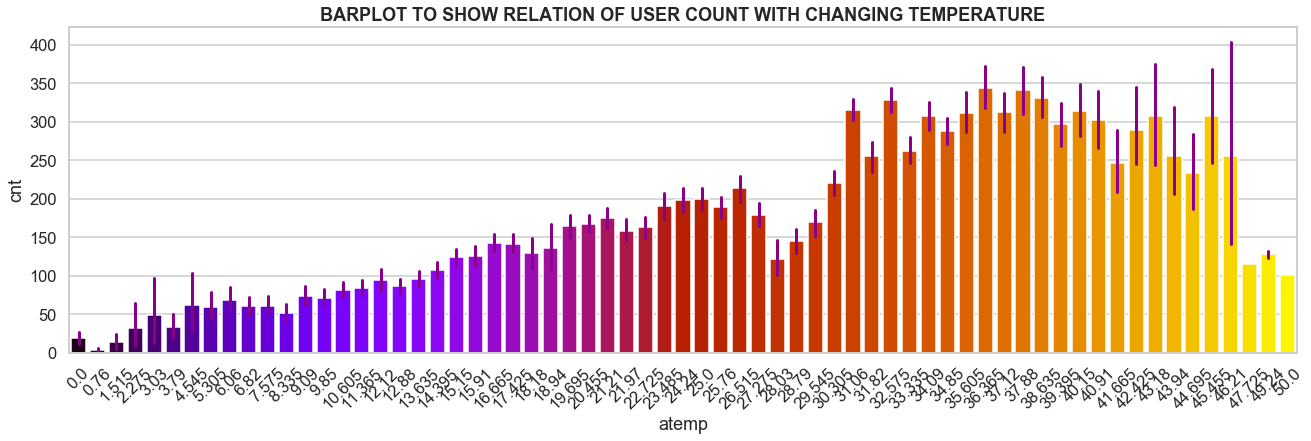

In [28]:
plt.figure(figsize=(22,6))
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=1)
map1=sns.barplot(x='atemp', y='cnt', data=byk, orient='v', color='turquoise', palette='gnuplot', saturation=12, errcolor='darkmagenta', errwidth=3)
map1.set_xticklabels(map1.get_xticklabels(),rotation=45)
plt.title('BARPLOT TO SHOW RELATION OF USER COUNT WITH CHANGING TEMPERATURE',weight='bold')
plt.show()

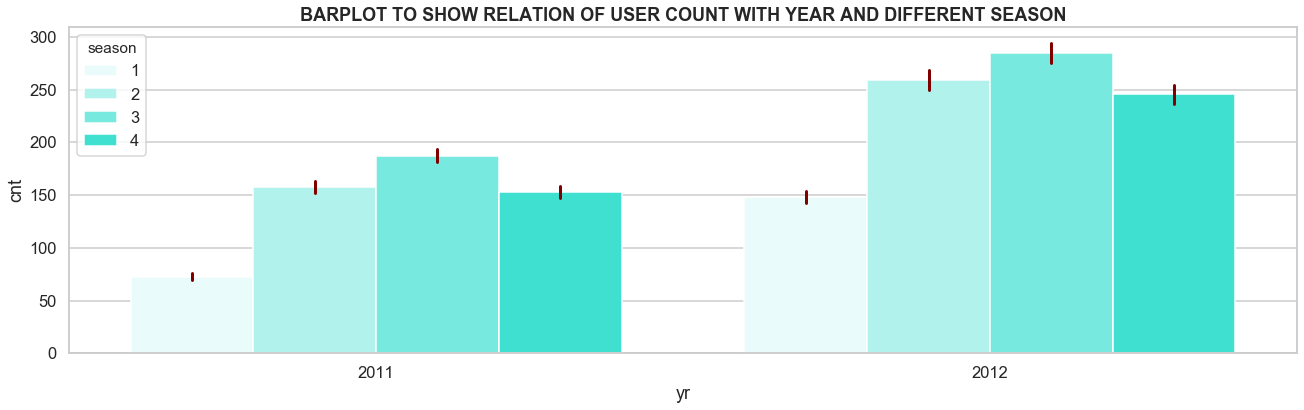

In [29]:
plt.figure(figsize=(22,6))
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=1)
sns.barplot(x='yr', y='cnt',hue='season', data=byk, orient='v', color='turquoise', saturation=12, errcolor='maroon', errwidth=3)
plt.title('BARPLOT TO SHOW RELATION OF USER COUNT WITH YEAR AND DIFFERENT SEASON',weight='bold')
plt.show()

        The above plot shows a increase in user count how ever the use is high in the season of fall in both the year

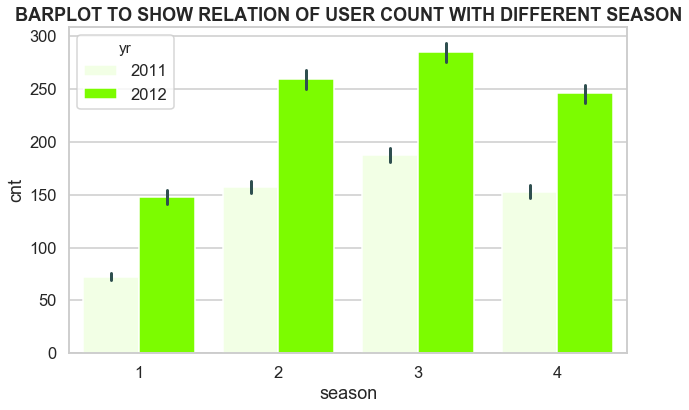

In [30]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=1)
sns.barplot(x='season', y='cnt',hue='yr', data=byk, orient='v', color='lawngreen', saturation=12, errcolor='darkslategray', errwidth=3)
plt.title('BARPLOT TO SHOW RELATION OF USER COUNT WITH DIFFERENT SEASON',weight='bold')
plt.show()

            The above plot is showing a high user count in the season of Fall

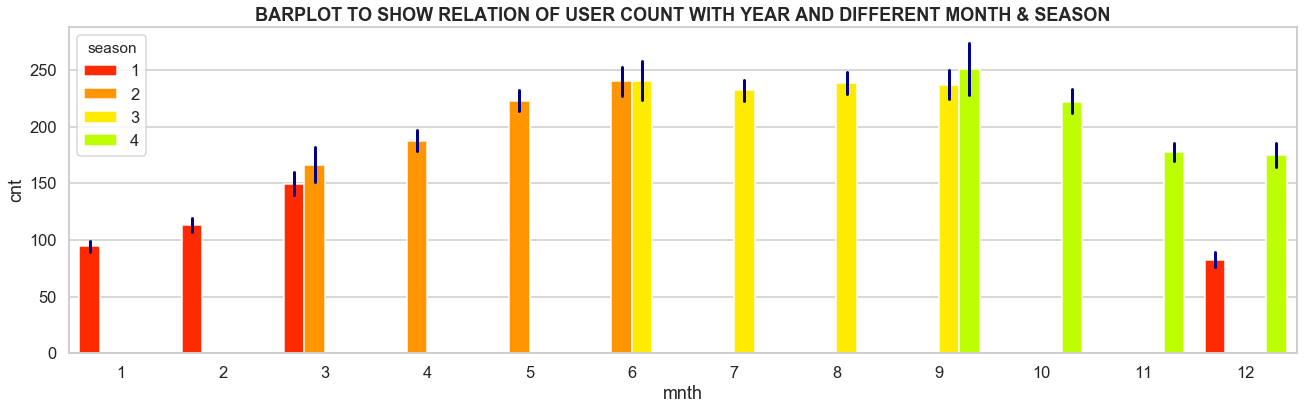

In [31]:
plt.figure(figsize=(22,6))
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=1)
sns.barplot(x='mnth', y='cnt',hue='season', data=byk, orient='v', color='indigo', palette='prism', saturation=12, errcolor='darkblue', errwidth=3)
plt.title('BARPLOT TO SHOW RELATION OF USER COUNT WITH YEAR AND DIFFERENT MONTH & SEASON',weight='bold')
plt.show()

        The above plotting is showing a raise in user count from month 6th to 9th i.e. the season of Fall & Winter

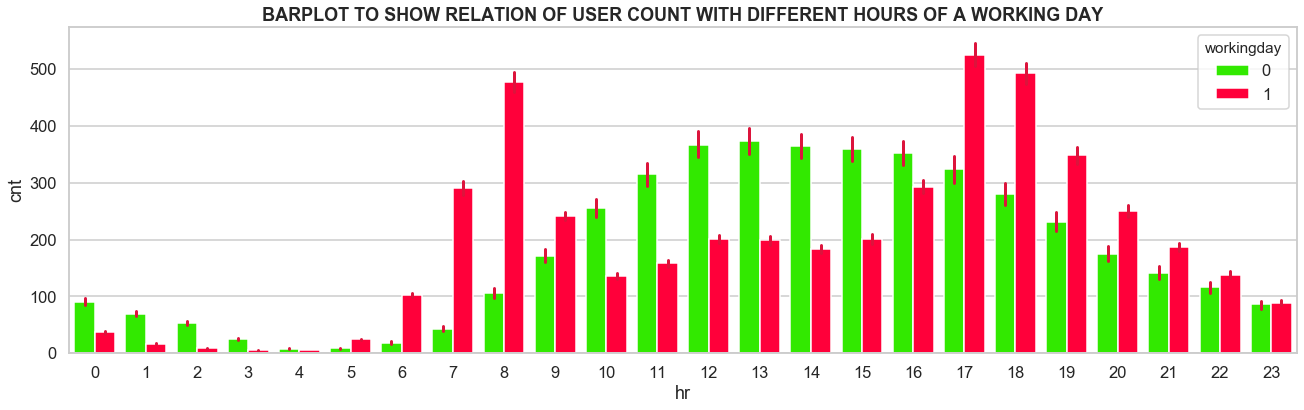

In [32]:
plt.figure(figsize=(22,6))
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=1)
sns.barplot(x='hr', y='cnt',hue='workingday', data=byk, orient='v', palette='prism', saturation=12, errcolor='crimson', errwidth=3)
plt.title('BARPLOT TO SHOW RELATION OF USER COUNT WITH DIFFERENT HOURS OF A WORKING DAY',weight='bold')
plt.show()

            The above plot is showing a high demand in the working days at 8th,17th & 18th hours time

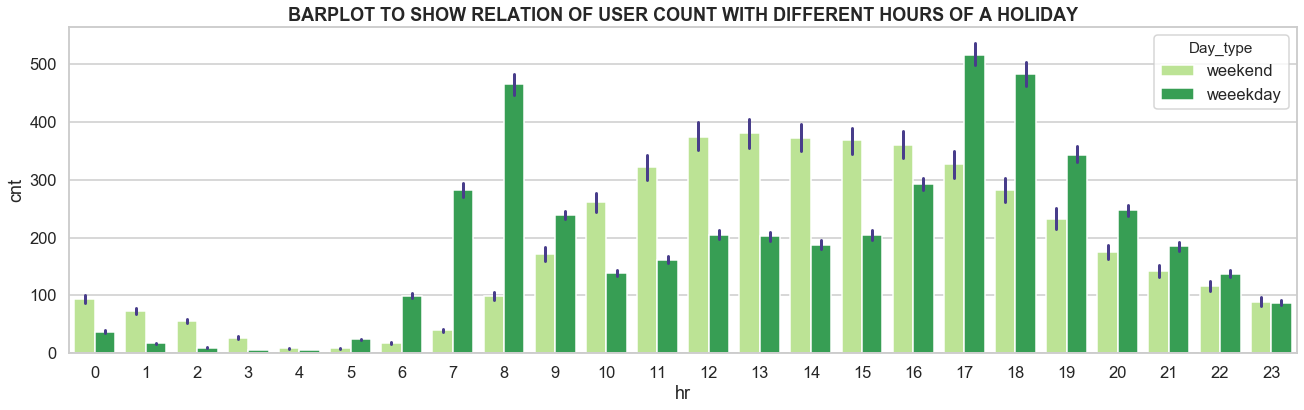

In [33]:
plt.figure(figsize=(22,6))
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=1)
sns.barplot(x='hr', y='cnt',hue='Day_type', data=byk, orient='v', color='violet', palette='YlGn', saturation=12, errcolor='darkslateblue', errwidth=3)
plt.title('BARPLOT TO SHOW RELATION OF USER COUNT WITH DIFFERENT HOURS OF A HOLIDAY',weight='bold')
plt.show()

                    The above plot is showing a high demand in holidays during 17th and 18th hours time in weekdays

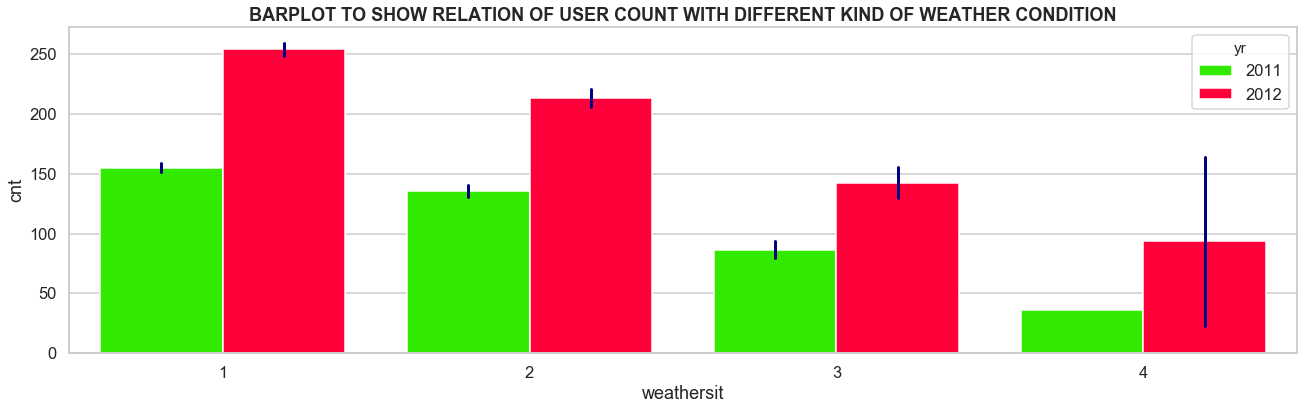

In [34]:
plt.figure(figsize=(22,6))
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=1)
sns.barplot(x='weathersit', y='cnt',hue='yr', data=byk, orient='v', color='aqua', palette='prism', saturation=12, errcolor='navy', errwidth=3)
plt.title('BARPLOT TO SHOW RELATION OF USER COUNT WITH DIFFERENT KIND OF WEATHER CONDITION',weight='bold')
plt.show()

    The plot is showing a high demand in the clear weather condition while the demand is too low in extreme conditions
    but as compared to 2011 there was a raise in demand in all conditions

Text(0.5, 1.0, 'PLOT TO SHOW RELATION OF USER COUNT IN DIFFERENT HOURS IN DIFFERENT SEASONS')

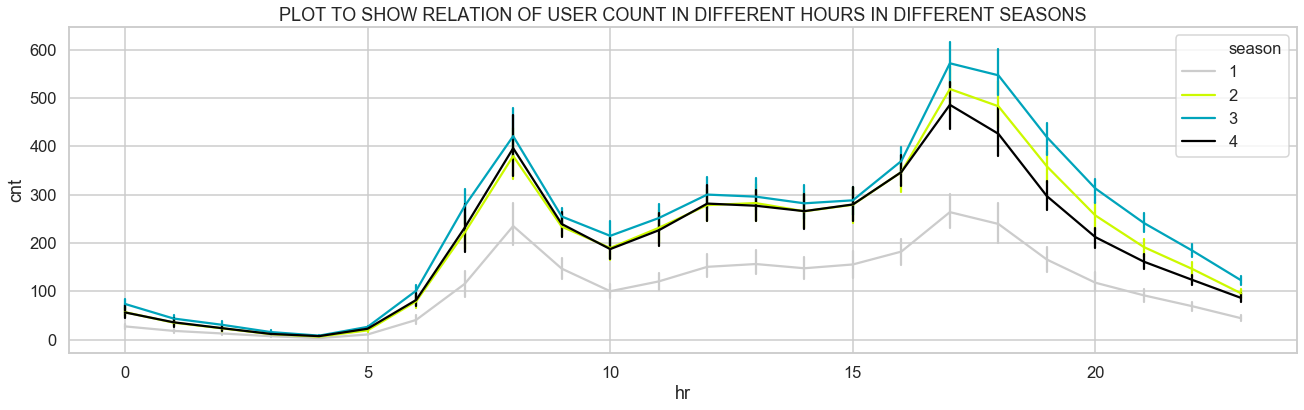

In [35]:
plt.figure(figsize=(22,6))
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=1)
sns.lineplot(x='hr',y='cnt',hue='season',data=byk,palette='nipy_spectral_r',dashes=True,estimator='mean',ci=100,err_style='bars',legend='brief')
plt.title('PLOT TO SHOW RELATION OF USER COUNT IN DIFFERENT HOURS IN DIFFERENT SEASONS')

    The above plotting is showing a high demand at 16th and 17th hrs in the season of Summer,Fall,Winter

Text(0.5, 1.0, 'PLOT TO SHOW RELATION OF USER COUNT IN DIFFERENT SEASONS WITH VAYRING HUMIDITY')

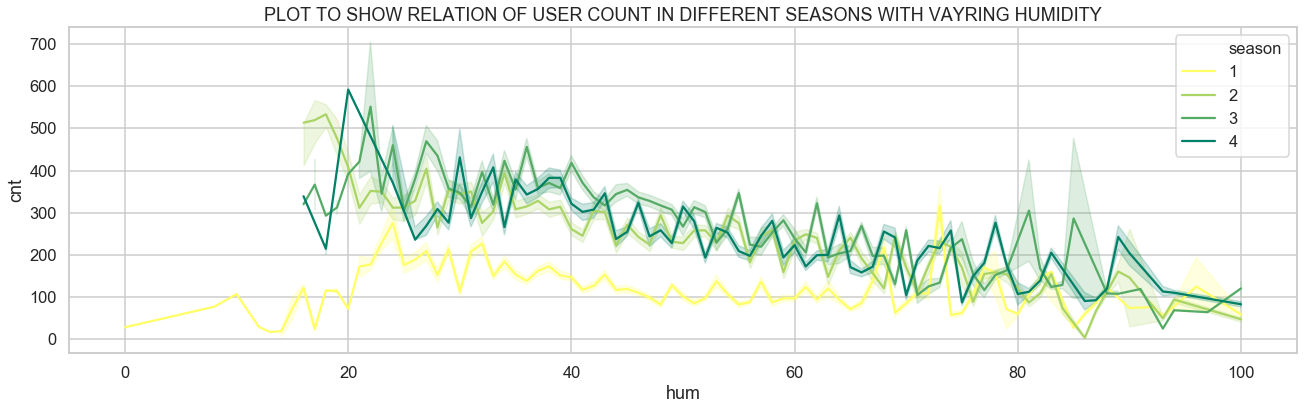

In [36]:
plt.figure(figsize=(22,6))
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=1)
sns.lineplot(x='hum',y='cnt',hue='season',data=byk,color='olive',palette='summer_r',markers='o',dashes=True,estimator='mean',ci=50,err_style='band',legend='brief')
plt.title('PLOT TO SHOW RELATION OF USER COUNT IN DIFFERENT SEASONS WITH VAYRING HUMIDITY')

    The above plot is shoowing a decrease in demand of bike with increase in humidity

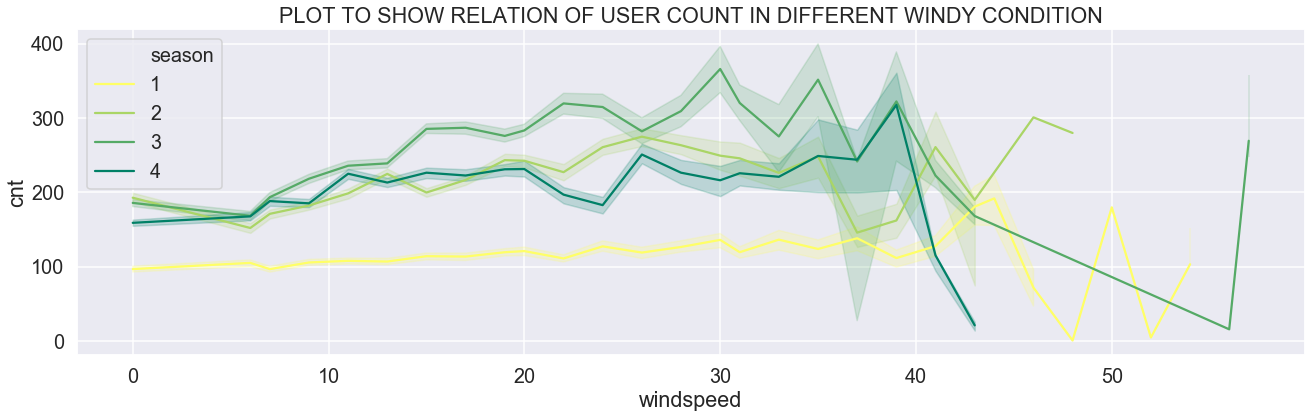

In [37]:
plt.figure(figsize=(22,6))
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=1.2)
sns.lineplot(x='windspeed',y='cnt',hue='season',data=byk,color='olive',palette='summer_r',markers='o',dashes=True,estimator="mean",ci=50,err_style='band',legend='brief')
plt.title('PLOT TO SHOW RELATION OF USER COUNT IN DIFFERENT WINDY CONDITION')
plt.show()

    The above plotting is showing a high demand of bikes at the windspeed in between 30 to 40

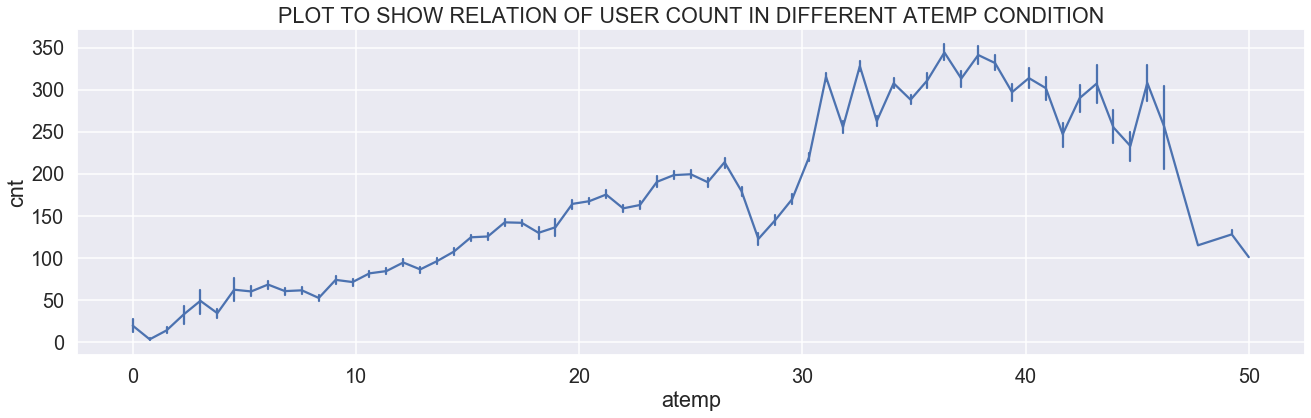

In [38]:
plt.figure(figsize=(22,6))
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=1.2)
sns.lineplot(x='atemp',y='cnt',data=byk,palette='lightseagreen',markers='o',dashes=True,estimator="mean",ci=50,err_style='bars',legend='brief')
plt.title('PLOT TO SHOW RELATION OF USER COUNT IN DIFFERENT ATEMP CONDITION')
plt.show()

        The above plotting is showing a increase in demand in an atemp range of 30 to 40

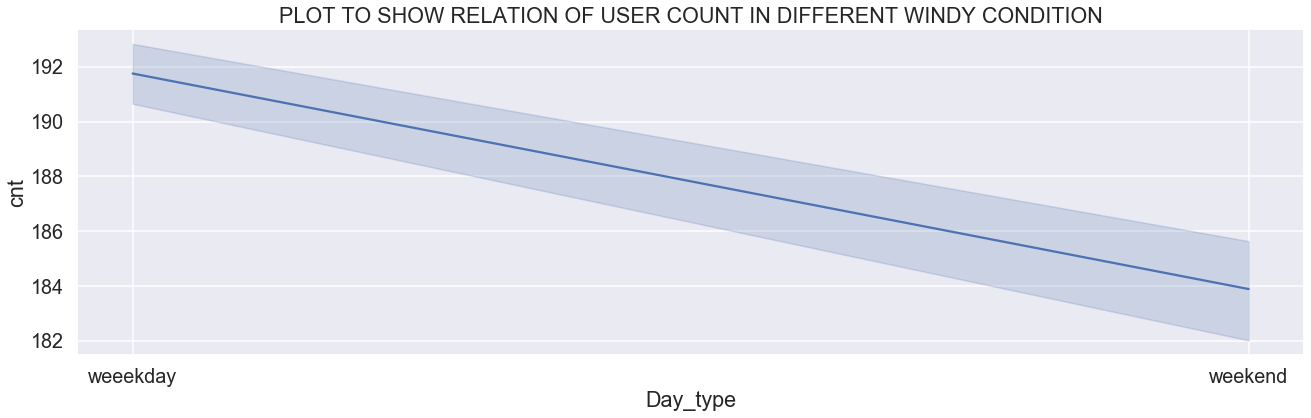

In [39]:
plt.figure(figsize=(22,6))
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=1.2)
sns.lineplot(x='Day_type',y='cnt',data=byk,palette='lightseagreen',markers='o',dashes=True,estimator="mean",ci=50,err_style='band',legend='brief')
plt.title('PLOT TO SHOW RELATION OF USER COUNT IN DIFFERENT WINDY CONDITION')
plt.show()

        The above plot is showing  a high demand in Weekdays

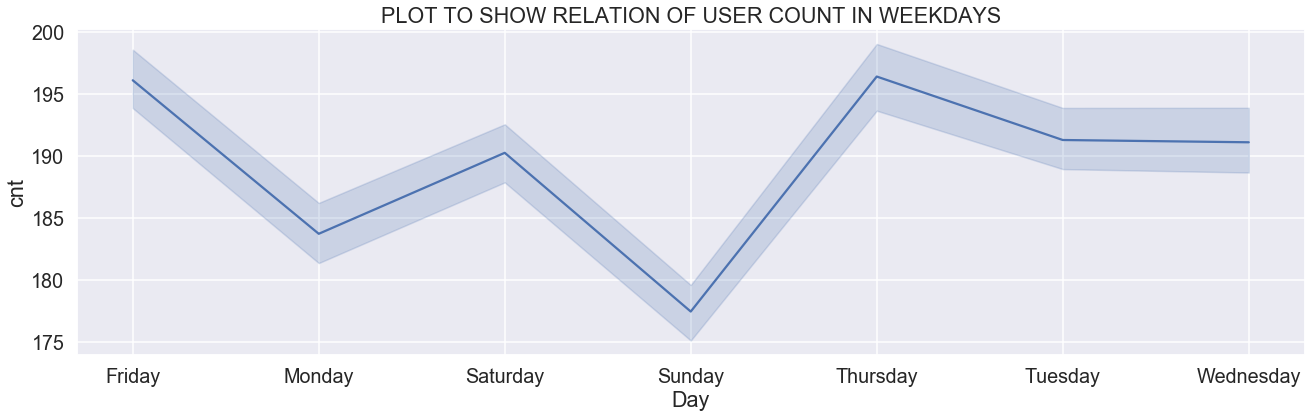

In [40]:
plt.figure(figsize=(22,6))
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=1.2)
sns.lineplot(x='Day',y='cnt',data=byk,palette='lightseagreen',markers='o',dashes=True,estimator="mean",ci=50,err_style='band',legend='brief')
plt.title('PLOT TO SHOW RELATION OF USER COUNT IN WEEKDAYS')
plt.show()

    The plot is showing a high user count in Thursday and lowest on sunday

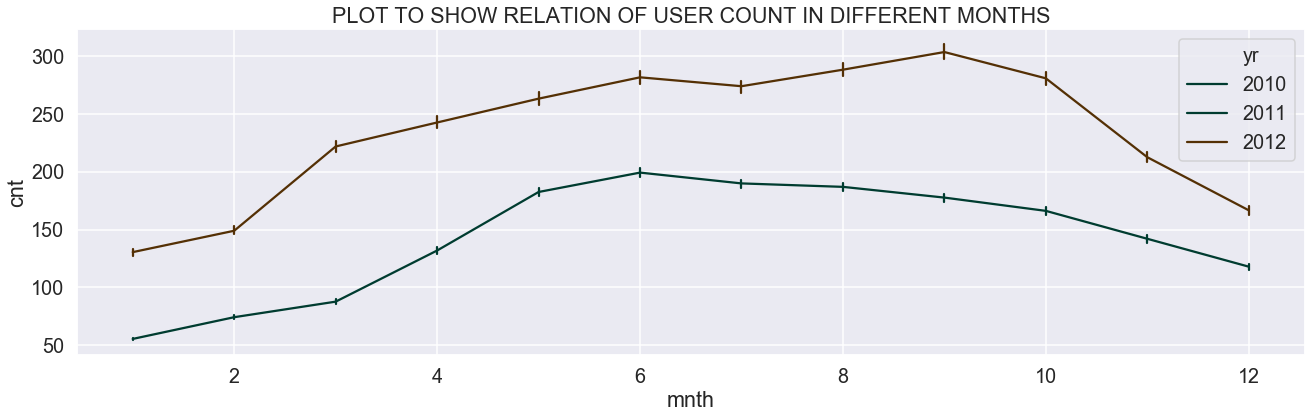

In [41]:
plt.figure(figsize=(22,6))
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=1.2)
sns.lineplot(x='mnth',y='cnt',hue='yr',data=byk,palette='BrBG_r',markers='o',dashes=True,estimator="mean",ci=50,err_style='bars',legend='brief')
plt.title('PLOT TO SHOW RELATION OF USER COUNT IN DIFFERENT MONTHS')
plt.show()

In [42]:
#label Encoding all the categorical datas
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
byk['mnth']=lbl.fit_transform(byk['mnth'])
byk['Day']=lbl.fit_transform(byk['Day'])
byk['Day_type']=lbl.fit_transform(byk['Day_type'])



#boxplot to visualize the outliers in the dataset

In [43]:
cl=byk.columns.values
cl

array(['season', 'yr', 'mnth', 'hr', 'Day', 'Day_type', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'], dtype=object)

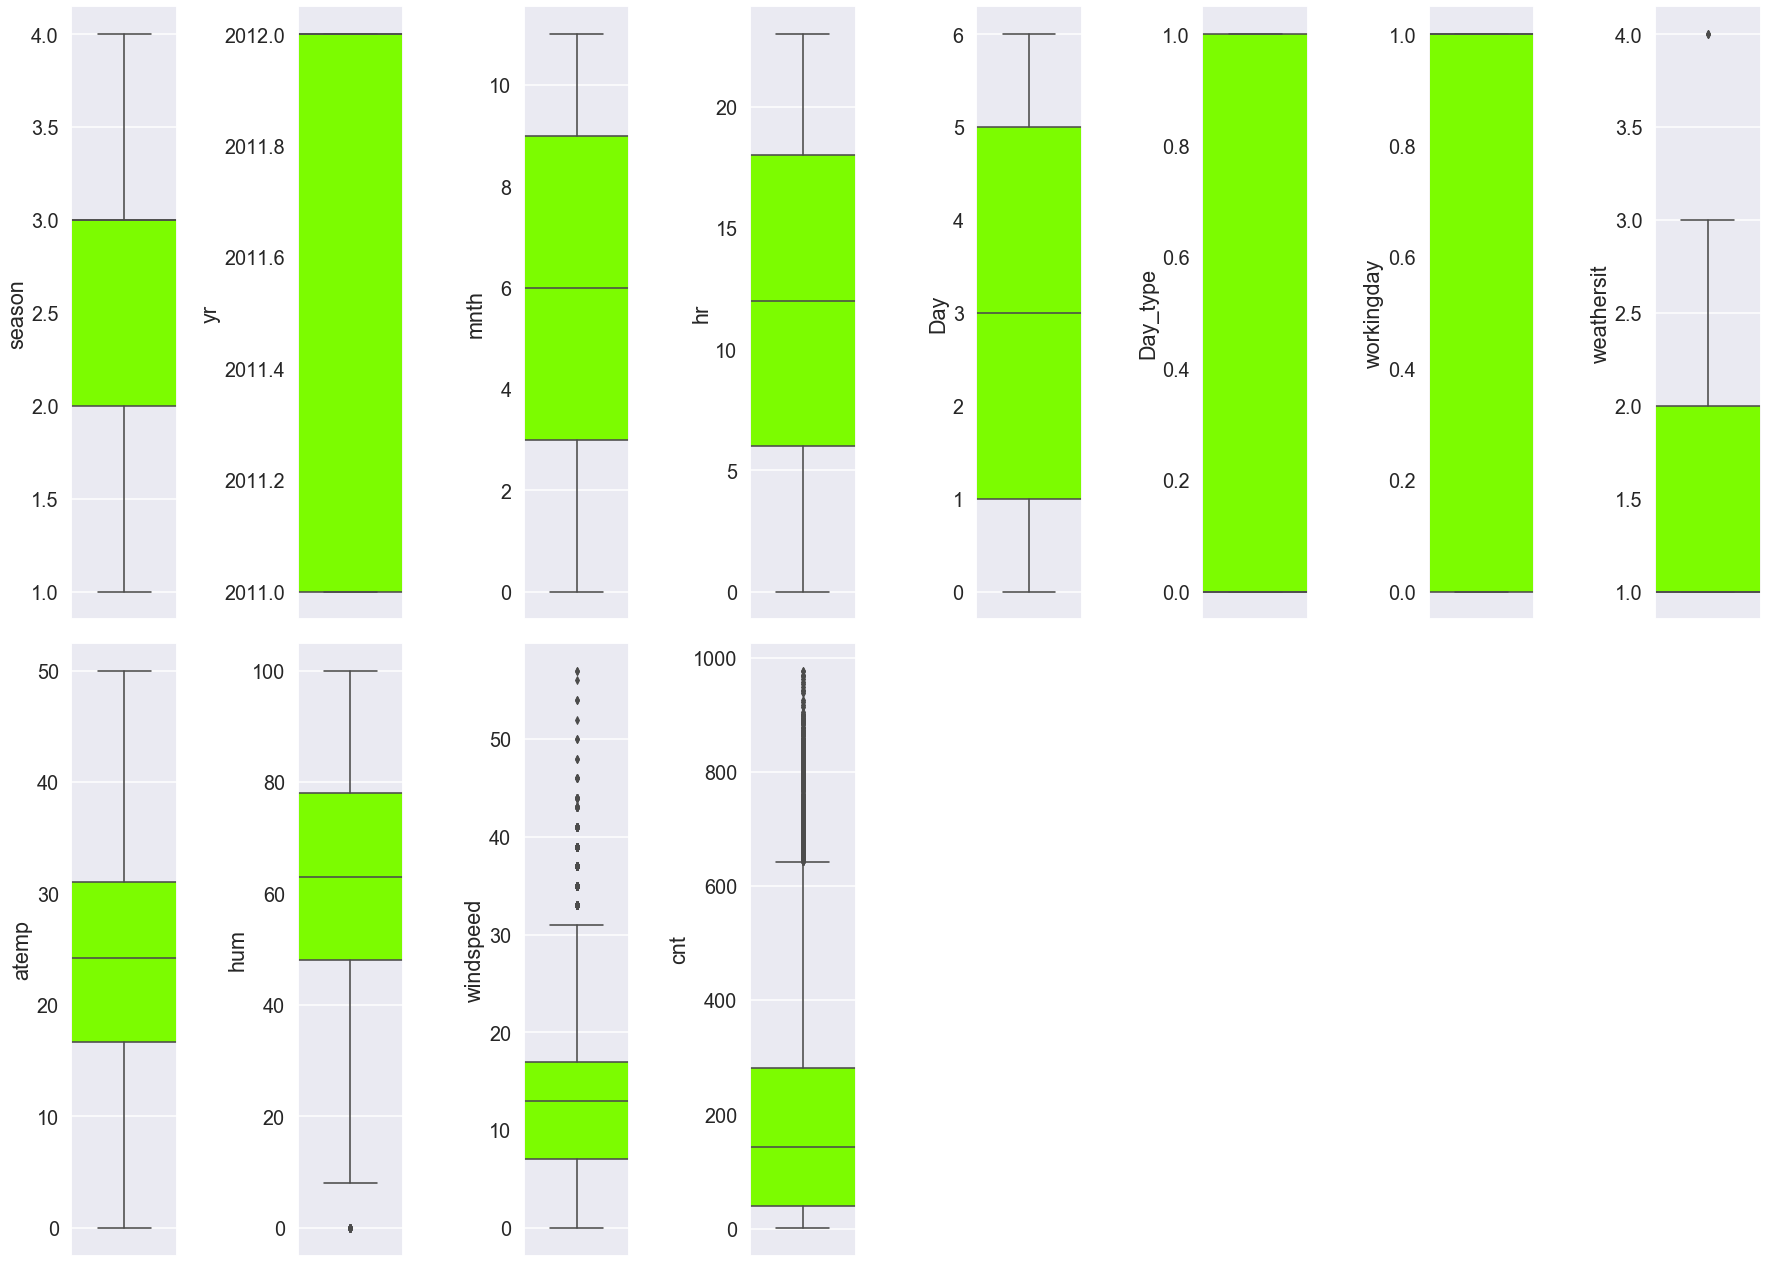

In [44]:
plt.figure(figsize=(25,18))
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=1.2)
for i in range(0,12):
    plt.subplot(2,8,i+1)
    sns.boxplot(x=byk[cl[i]],data=byk,color='lawngreen',orient='v',linewidth=1.6,width=1,saturation=22)
plt.tight_layout()

In [45]:
#outlier removal
z=np.abs(zscore(byk))
z

array([[1.35653187, 1.0051349 , 1.61036386, ..., 0.94741575, 1.55393519,
        0.95645383],
       [1.35653187, 1.0051349 , 1.61036386, ..., 0.89558326, 1.55393519,
        0.82413671],
       [1.35653187, 1.0051349 , 1.61036386, ..., 0.89558326, 1.55393519,
        0.86824242],
       ...,
       [1.35653187, 0.99489134, 1.58859088, ..., 0.14106659, 0.21181501,
        0.54847605],
       [1.35653187, 0.99489134, 1.58859088, ..., 0.34839655, 0.45618068,
        0.70835923],
       [1.35653187, 0.99489134, 1.58859088, ..., 0.11809588, 0.45618068,
        0.77451779]])

In [46]:
outliers=(np.where(z>3))
outliers

(array([  265,   467,   468,   585,   870,  1007,  1009,  1010,  1014,
         1017,  1018,  1105,  1118,  1119,  1120,  1121,  1123,  1124,
         1125,  1126,  1127,  1258,  1259,  1261,  1264,  1332,  1333,
         1477,  1482,  1551,  1552,  1553,  1554,  1555,  1556,  1557,
         1558,  1559,  1560,  1561,  1562,  1563,  1564,  1565,  1566,
         1567,  1568,  1568,  1569,  1570,  1571,  1572,  1873,  2156,
         2171,  2438,  2440,  2441,  2443,  2552,  2847,  2895,  4315,
         4316,  4768,  5155,  5635,  5639,  5843,  6076,  6906,  6910,
         8067,  8068,  8512,  8704,  8707,  8853,  8941,  8945,  9122,
         9282,  9642,  9645,  9650,  9651,  9652,  9660,  9955,  9956,
         9957,  9969,  9970,  9974,  9976, 10167, 10191, 10196, 10258,
        10259, 10260, 10261, 10262, 10288, 10382, 10405, 10406, 10430,
        10526, 10549, 10550, 10574, 10597, 10598, 10621, 10622, 10686,
        10687, 10689, 10691, 10692, 10884, 10885, 10908, 10909, 10932,
      

In [47]:
bike=byk[(z<3).all(axis=1)]


In [48]:
print('\tshape of the dataset before outlier reoval was:', byk.shape,'\n\tshape of the datset after outlier removal becomes:',bike.shape)

	shape of the dataset before outlier reoval was: (17377, 12) 
	shape of the datset after outlier removal becomes: (17002, 12)


    so a total of 375 instances with outlier values were removed

In [49]:
bike

,season,yr,mnth,hr,Day,Day_type,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,2011,0,0,2,1,0,1,14.395,81.0,0.000,16
1,1,2011,0,1,2,1,0,1,13.635,80.0,0.000,40
2,1,2011,0,2,2,1,0,1,13.635,80.0,0.000,32
3,1,2011,0,3,2,1,0,1,14.395,75.0,0.000,13
4,1,2011,0,4,2,1,0,1,14.395,75.0,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,2012,11,19,1,0,1,2,12.880,60.0,11.001,119
17375,1,2012,11,20,1,0,1,2,12.880,60.0,11.001,89
17376,1,2012,11,21,1,0,1,1,12.880,60.0,11.001,90
17377,1,2012,11,22,1,0,1,1,13.635,56.0,8.998,61


In [50]:
#visualizing distribution and skewness of all attributes by the help of distplot 

In [51]:
cl=bike.columns.values
cl

array(['season', 'yr', 'mnth', 'hr', 'Day', 'Day_type', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'], dtype=object)

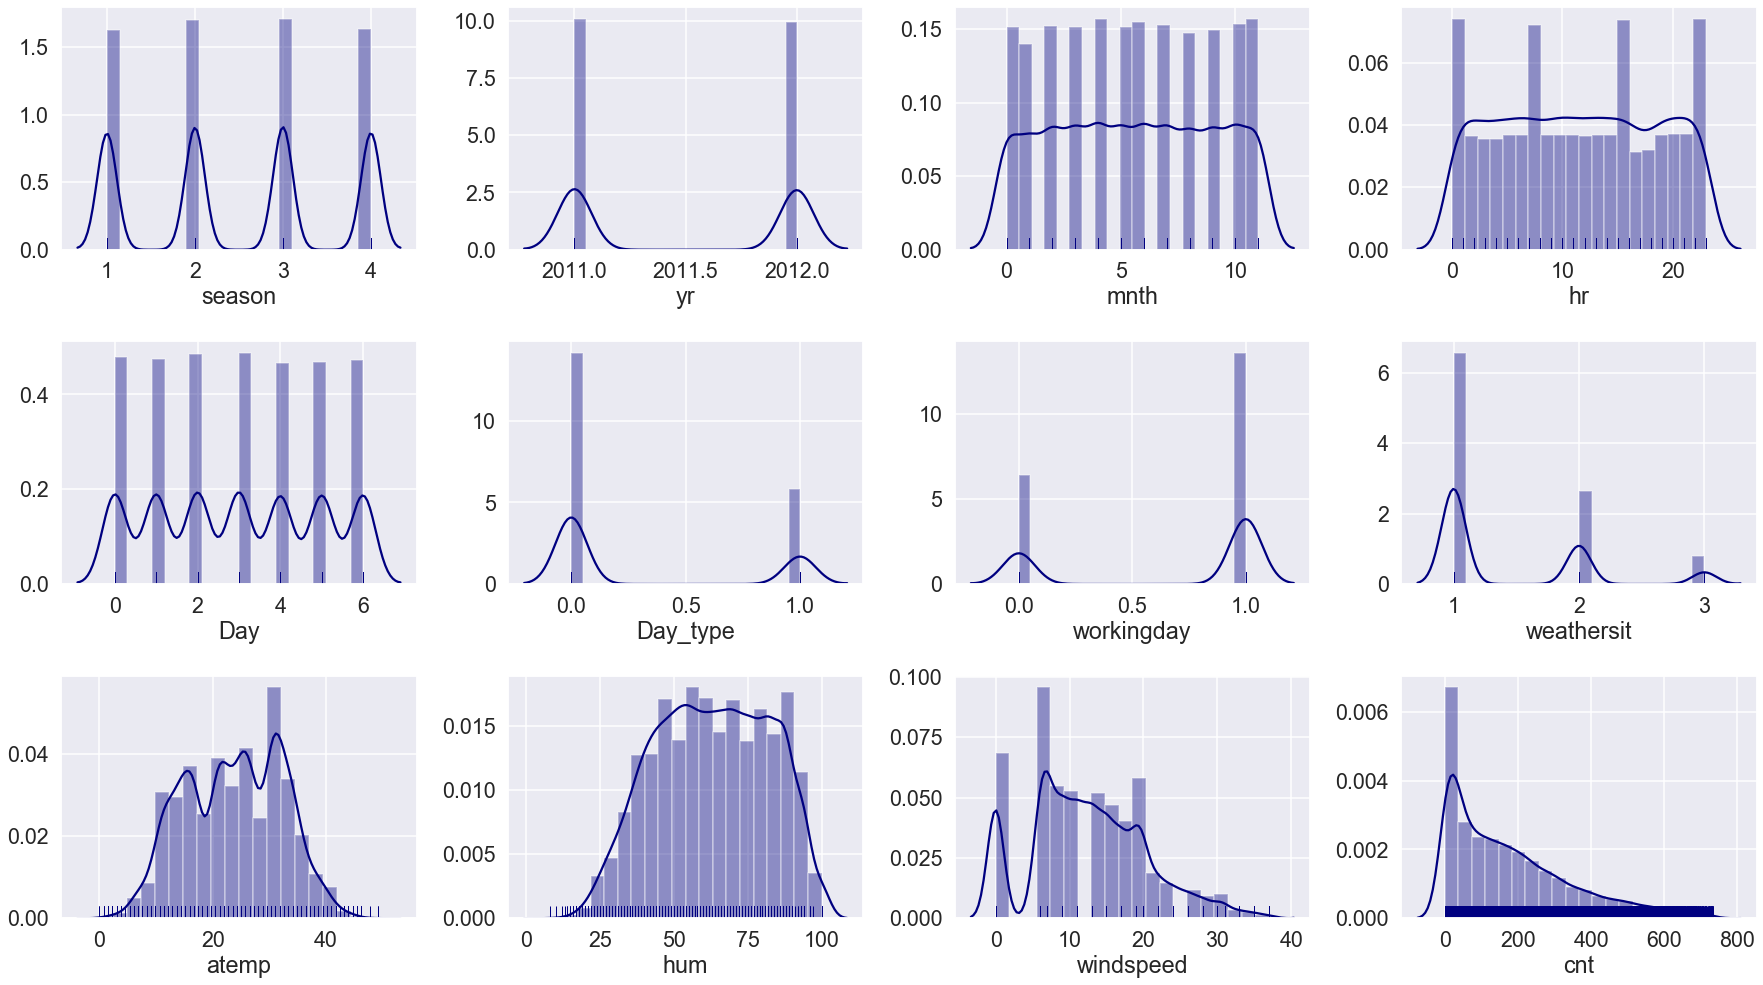

In [52]:
plt.figure(figsize=(25,18))
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=1.3)
for i in range(0,12):
    plt.subplot(4,4,i+1)
    sns.distplot(bike[cl[i]],color='navy',hist=True,kde=True,rug=True,bins=20)
plt.tight_layout()

In [53]:
#skewness checking and removal

In [54]:
bike.skew()

season       -0.003045
yr            0.016235
mnth         -0.006803
hr            0.012944
Day           0.013369
Day_type      0.914875
workingday   -0.765343
weathersit    1.218478
atemp        -0.075353
hum          -0.088926
windspeed     0.385094
cnt           1.048725
dtype: float64

In [55]:
#skew of 0.55 is allowable so any attribute having skew value more than 0.55 will be treated as skewed data 
for i in bike.columns:
    if bike.skew().loc[i]>0.55:
        bike[i]=np.log1p(bike[i])
print(bike.skew())  

season       -0.003045
yr            0.016235
mnth         -0.006803
hr            0.012944
Day           0.013369
Day_type      0.914875
workingday   -0.765343
weathersit    0.988960
atemp        -0.075353
hum          -0.088926
windspeed     0.385094
cnt          -0.838743
dtype: float64


In [56]:
bike_cor=bike.corr()
bike_cor
#checking co_relation

,season,yr,mnth,hr,Day,Day_type,workingday,weathersit,atemp,hum,windspeed,cnt
season,1.000000,-0.018414,0.830445,-0.006690,0.007527,-0.007422,0.010628,-0.010967,0.316710,0.144261,-0.139871,0.160447
yr,-0.018414,1.000000,-0.017160,-0.012327,-0.002092,0.007153,-0.010497,-0.008801,0.027435,-0.080405,-0.011067,0.149515
mnth,0.830445,-0.017160,1.000000,-0.005100,-0.003710,-0.002356,-0.004130,0.009719,0.206024,0.160040,-0.129445,0.109176
hr,-0.006690,-0.012327,-0.005100,1.000000,0.000371,0.003724,-0.004307,-0.022505,0.126224,-0.273804,0.133944,0.563866
Day,0.007527,-0.002092,-0.003710,0.000371,1.000000,-0.155953,0.194810,0.030548,0.029167,0.036252,0.008655,-0.027137
Day_type,-0.007422,0.007153,-0.002356,0.003724,-0.155953,1.000000,-0.933403,-0.041941,-0.036114,-0.017855,0.008560,0.017823
workingday,0.010628,-0.010497,-0.004130,-0.004307,0.194810,-0.933403,1.000000,0.046558,0.045835,0.022453,-0.010613,-0.009067
weathersit,-0.010967,-0.008801,0.009719,-0.022505,0.030548,-0.041941,0.046558,1.000000,-0.103373,0.426688,0.013766,-0.108923
atemp,0.316710,0.027435,0.206024,0.126224,0.029167,-0.036114,0.045835,-0.103373,1.000000,-0.049428,-0.058732,0.374647
hum,0.144261,-0.080405,0.160040,-0.273804,0.036252,-0.017855,0.022453,0.426688,-0.049428,1.000000,-0.285853,-0.343842


<Figure size 864x720 with 0 Axes>

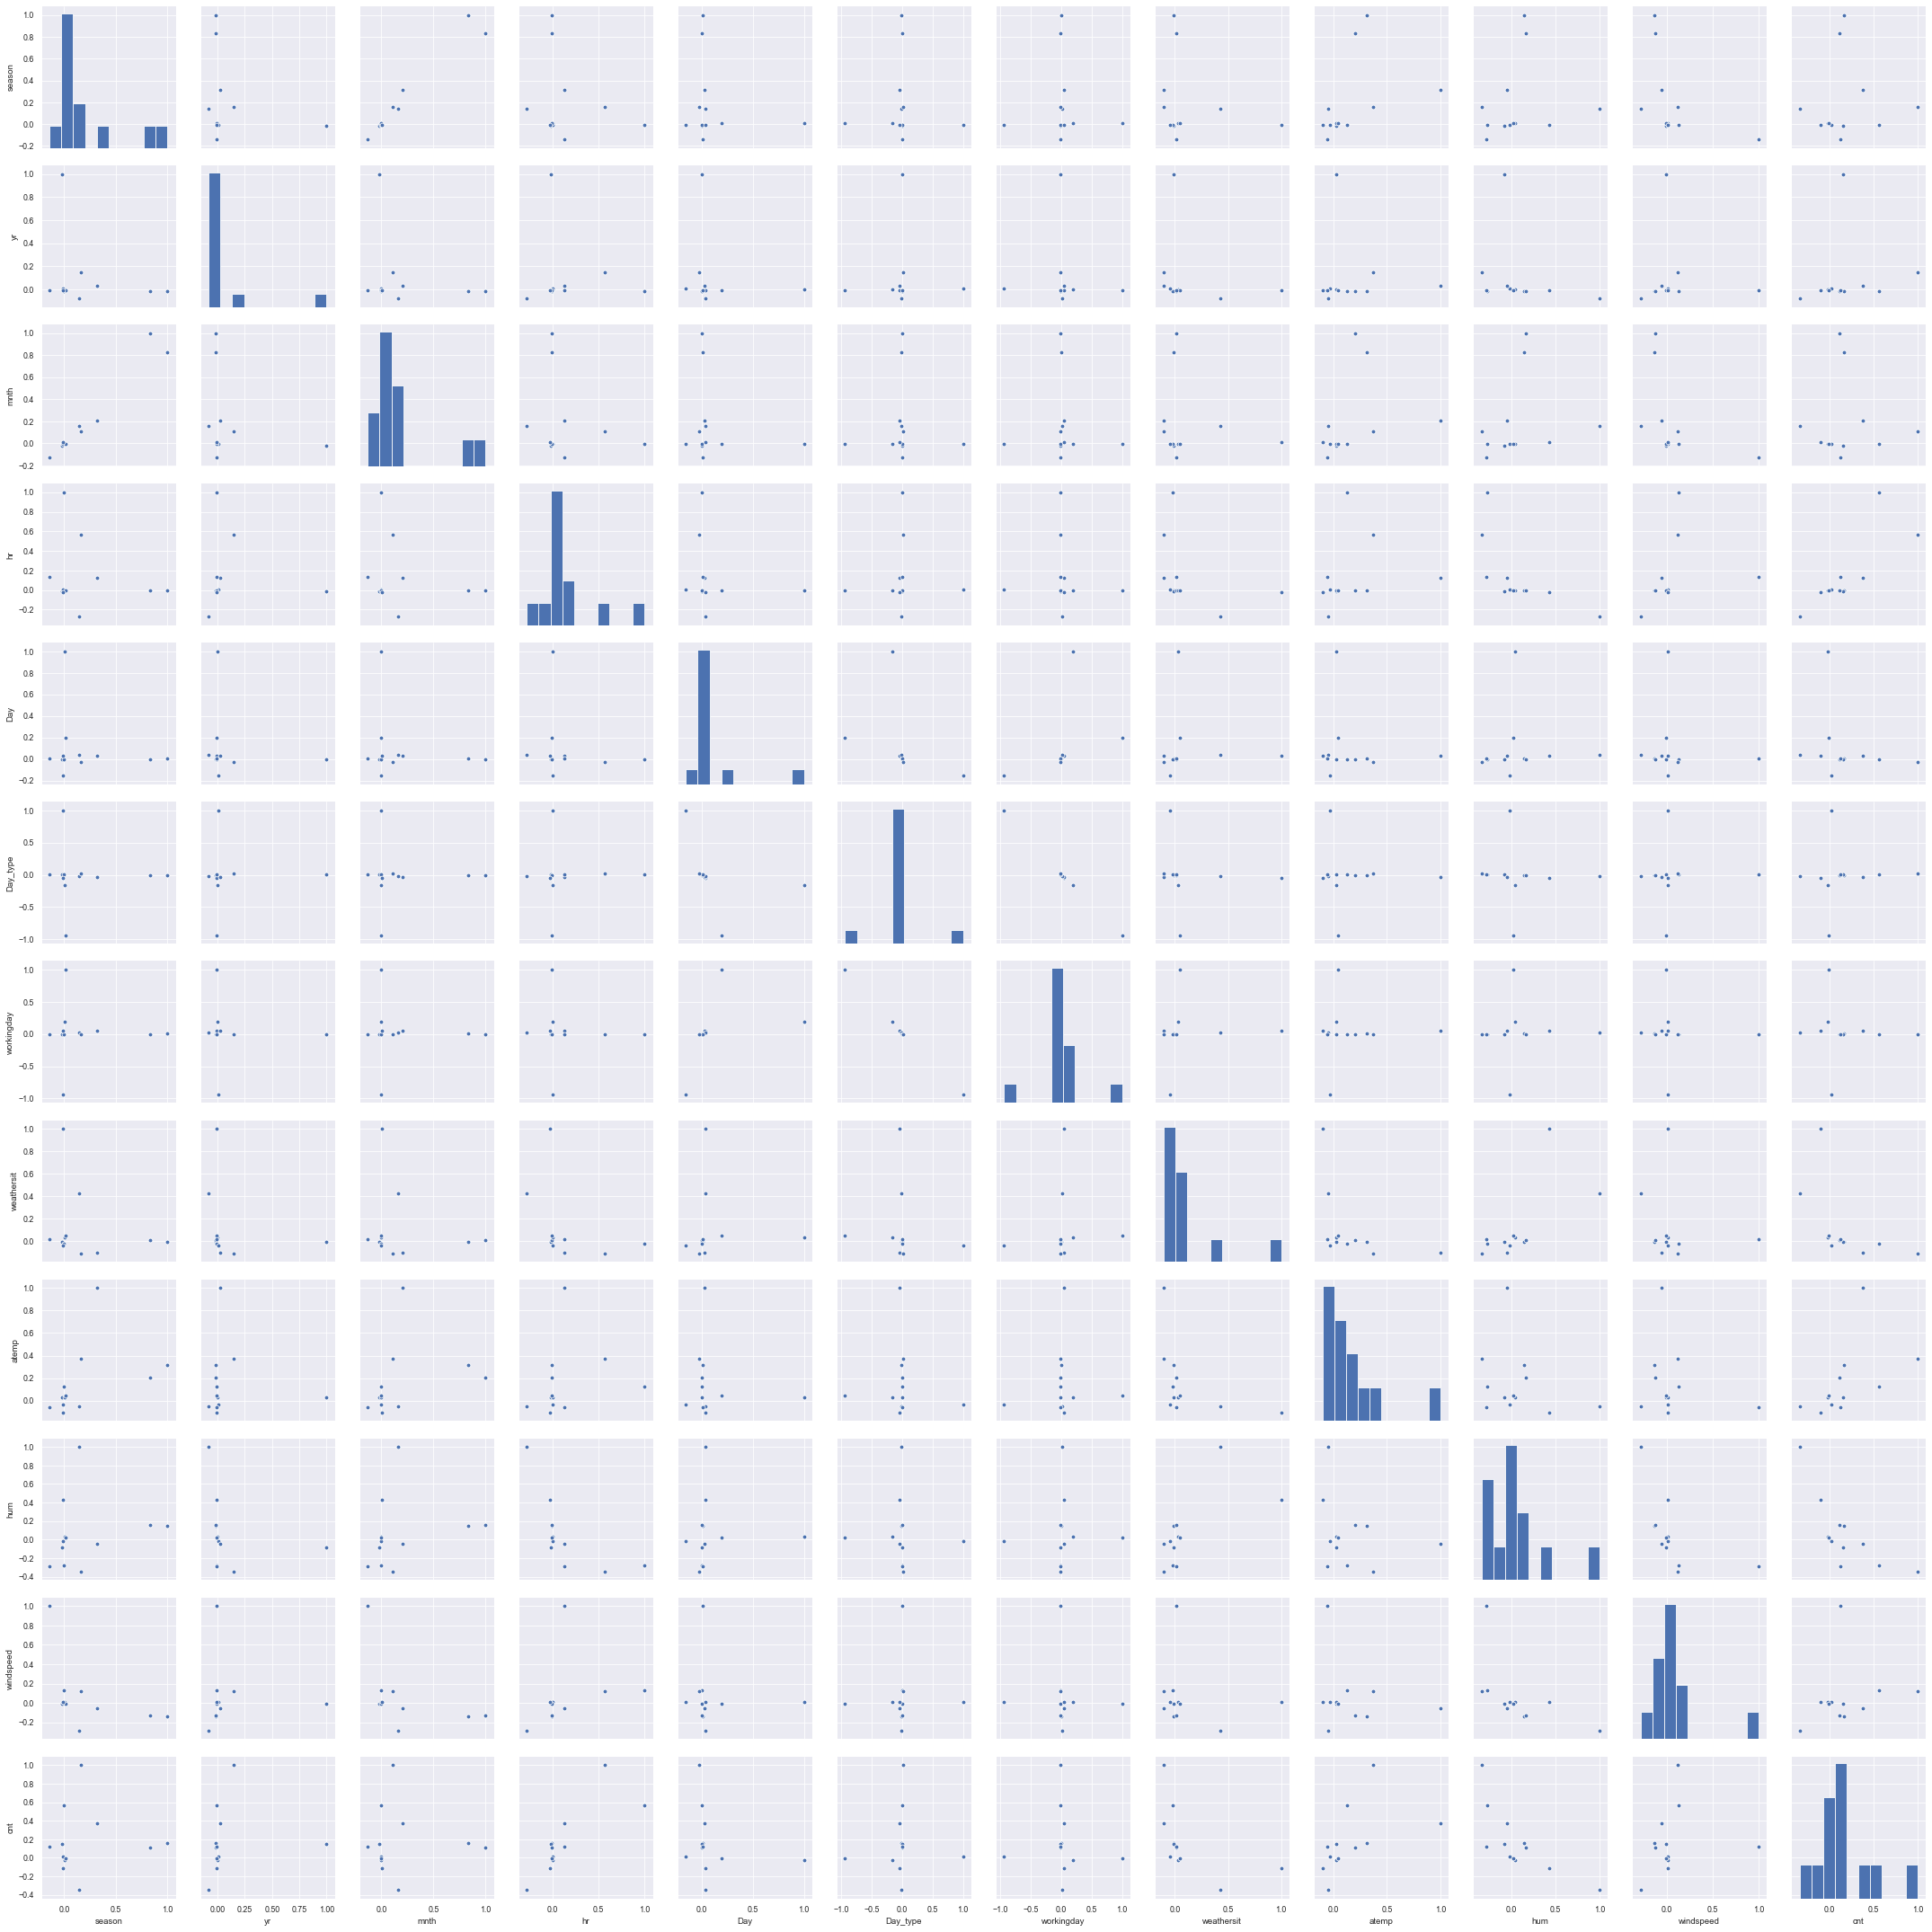

In [57]:
plt.figure(figsize=(12,10))
sns.set_context('paper',font_scale=1.0)
sns.pairplot(bike_cor)
plt.show()

In [58]:
#importing important libraries for modelling
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [59]:
bike

,season,yr,mnth,hr,Day,Day_type,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,2011,0,0,2,0.693147,0,0.693147,14.395,81.0,0.000,2.833213
1,1,2011,0,1,2,0.693147,0,0.693147,13.635,80.0,0.000,3.713572
2,1,2011,0,2,2,0.693147,0,0.693147,13.635,80.0,0.000,3.496508
3,1,2011,0,3,2,0.693147,0,0.693147,14.395,75.0,0.000,2.639057
4,1,2011,0,4,2,0.693147,0,0.693147,14.395,75.0,0.000,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,2012,11,19,1,0.000000,1,1.098612,12.880,60.0,11.001,4.787492
17375,1,2012,11,20,1,0.000000,1,1.098612,12.880,60.0,11.001,4.499810
17376,1,2012,11,21,1,0.000000,1,0.693147,12.880,60.0,11.001,4.510860
17377,1,2012,11,22,1,0.000000,1,0.693147,13.635,56.0,8.998,4.127134


In [60]:
x=bike.iloc[:,0:11]
x

,season,yr,mnth,hr,Day,Day_type,workingday,weathersit,atemp,hum,windspeed
0,1,2011,0,0,2,0.693147,0,0.693147,14.395,81.0,0.000
1,1,2011,0,1,2,0.693147,0,0.693147,13.635,80.0,0.000
2,1,2011,0,2,2,0.693147,0,0.693147,13.635,80.0,0.000
3,1,2011,0,3,2,0.693147,0,0.693147,14.395,75.0,0.000
4,1,2011,0,4,2,0.693147,0,0.693147,14.395,75.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,2012,11,19,1,0.000000,1,1.098612,12.880,60.0,11.001
17375,1,2012,11,20,1,0.000000,1,1.098612,12.880,60.0,11.001
17376,1,2012,11,21,1,0.000000,1,0.693147,12.880,60.0,11.001
17377,1,2012,11,22,1,0.000000,1,0.693147,13.635,56.0,8.998


In [61]:
y=bike.iloc[:,-1]
print(y,'\n shape of y:',y.shape)

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
17374    4.787492
17375    4.499810
17376    4.510860
17377    4.127134
17378    3.912023
Name: cnt, Length: 17002, dtype: float64 
 shape of y: (17002,)


In [62]:
ss=StandardScaler()
x=ss.fit_transform(x)
print(x,'\n\n shape of x=', x.shape)

[[-1.35590075 -0.99191598 -1.60666035 ... -1.08569879  0.93868903
  -1.58865887]
 [-1.35590075 -0.99191598 -1.60666035 ... -1.17430399  0.8863697
  -1.58865887]
 [-1.35590075 -0.99191598 -1.60666035 ... -1.17430399  0.8863697
  -1.58865887]
 ...
 [-1.35590075  1.0081499   1.58430913 ... -1.26232626 -0.16001675
  -0.19442924]
 [-1.35590075  1.0081499   1.58430913 ... -1.17430399 -0.36929404
  -0.4482827 ]
 [-1.35590075  1.0081499   1.58430913 ... -1.17430399  0.10157986
  -0.4482827 ]] 

 shape of x= (17002, 11)


In [63]:
y=np.array(y)
y=y.reshape(-1,1)
print(y.shape)

(17002, 1)


implementing PCA method to reduce the dimensions on X which will give the highly corelated columns
we will be decompsing the X to 7 highly corealted columns

In [64]:
pca=PCA(n_components=9,random_state=85)
pca.fit(x)
X=pca.transform(x)
print('shape of x after PCA:',X.shape,'shape of x before pca:', x.shape)
print('\n\nX---:\n',X)
val=pca.explained_variance_ratio_
print('\n\npca.explained_variance_ratio:',val)

shape of x after PCA: (17002, 9) shape of x before pca: (17002, 11)


X---:
 [[ 2.12464162  1.2510351   2.42897977 ... -0.51705881 -0.02554969
  -0.17128815]
 [ 2.17373454  1.23620286  2.3697926  ... -0.53705191  0.11383238
  -0.17433482]
 [ 2.18478977  1.23393301  2.31094537 ... -0.60804985  0.18449632
  -0.2127641 ]
 ...
 [ 0.17122839 -0.64671533 -0.6467425  ...  0.04154419  1.92087078
  -0.7877799 ]
 [ 0.15803352 -0.62866572 -0.79683903 ... -0.18815878  2.05179187
  -0.59704654]
 [ 0.03849237 -0.60024621 -0.57607641 ... -0.32687524  2.07571243
  -0.97684953]]


pca.explained_variance_ratio: [0.19079319 0.18032149 0.14596211 0.09723396 0.09032813 0.08527374
 0.08110715 0.06900621 0.03936212]


In [65]:
#creating a function to get the best random state for optimum performance of a model

def model(mod,X,y):
    max_r=0
    for i in range(30,180):
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.40,random_state=i)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        r2score=r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        if r2score > max_r:
            max_r=r2score
            random_state=i
    print('the random state at ', mod,'\nis: ',random_state, 
          '\nand it produces \n r2 score of ',r2score,
          '\n mean abs error value of ', MAE,
          '\n mean squared error value of',MSE,
          '\n & root mean sq error ', RMSE)
    return random_state

In [66]:
lr=LinearRegression()
model1=model(lr,X,y)

the random state at  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 
is:  111 
and it produces 
 r2 score of  0.48612646080393074 
 mean abs error value of  0.7969599039497917 
 mean squared error value of 1.020837298761635 
 & root mean sq error  1.010364933458023


In [67]:
#checking for over/under fitting using cross_val_score
lr_scr=cross_val_score(lr,X,y,cv=30,scoring='r2')
print('the r2 score at liner regression model is=', lr_scr.mean())

the r2 score at liner regression model is= 0.4259777597183131


In [69]:
#decisiontreeregressor
dtr=DecisionTreeRegressor()
dtr_para={'criterion':['mse','mae'],'max_depth':[3,4,5]}
dtr_grid=GridSearchCV(dtr,dtr_para,cv=30)
dtr_grid.fit(X,y)
dtr_grid.best_params_

{'criterion': 'mse', 'max_depth': 5}

In [70]:
dtr=DecisionTreeRegressor(criterion='mse',max_depth=5)
model2=model(dtr,X,y)

the random state at  DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') 
is:  111 
and it produces 
 r2 score of  0.4496868989568997 
 mean abs error value of  0.7849743512417691 
 mean squared error value of 1.0932264393703857 
 & root mean sq error  1.0455746933482972


In [71]:
#checking for over/under fitting using cross_val_score
dtr_scr=cross_val_score(dtr,X,y,cv=30,scoring='r2')
print('the r2 score at DTR model is=', dtr_scr.mean())

the r2 score at DTR model is= 0.38374224231944337


In [72]:
#KNeighborsRegressor()
knr=KNeighborsRegressor()
k_para={'n_neighbors': range(4,20),'algorithm':['ball_tree', 'kd_tree', 'brute']}
k_grid=GridSearchCV(knr,k_para,cv=30)
k_grid.fit(X,y)
k_grid.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 5}

In [73]:
knr=KNeighborsRegressor(algorithm='kd_tree',n_neighbors=5)
model(knr,X,y)

the random state at  KNeighborsRegressor(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') 
is:  89 
and it produces 
 r2 score of  0.6806262554048921 
 mean abs error value of  0.568373342910461 
 mean squared error value of 0.6344530431318075 
 & root mean sq error  0.7965256073296122


89

In [74]:
#checking for over/under fitting using cross_val_score
knr_scr=cross_val_score(knr,X,y,cv=30,scoring='r2')
print('the r2 score at KNR model is=', knr_scr.mean())

the r2 score at KNR model is= 0.6230186927218782


In [75]:
#SVR
svr=SVR()
svr_para={'kernel':['rbf','poly','linear'],'gamma':[0.01,0.1]}
svr_grid=GridSearchCV(svr,svr_para,cv=30)
svr_grid.fit(X,y)
svr_grid.best_params_

{'gamma': 0.1, 'kernel': 'rbf'}

In [76]:
svr=SVR(kernel='rbf',gamma=0.1)
model(svr,X,y)


the random state at  SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 
is:  132 
and it produces 
 r2 score of  0.692906531878386 
 mean abs error value of  0.5521014423435455 
 mean squared error value of 0.6100576164226216 
 & root mean sq error  0.781061851854654


132

In [77]:
#checking for over/under fitting using cross_val_score
svr_scr=cross_val_score(svr,X,y,cv=30,scoring='r2')
print('the r2 score at SVR model is=', svr_scr.mean())

the r2 score at SVR model is= 0.6555520553998575


In [78]:
las=Lasso()
las_para={'alpha':(0.01,0.1,1,10)}
las_grid=GridSearchCV(las,las_para,cv=30)
las_grid.fit(X,y)
las_grid.best_params_


{'alpha': 0.01}

In [79]:
lso=Lasso(alpha=0.01)
model(lso,X,y)


the random state at  Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 
is:  111 
and it produces 
 r2 score of  0.4853857349675277 
 mean abs error value of  0.7978158971789643 
 mean squared error value of 1.0223087902946288 
 & root mean sq error  1.0110928692729608


111

In [80]:
#checking for over/under fitting using cross_val_score
lso_scr=cross_val_score(svr,X,y,cv=30,scoring='r2')
print('the r2 score at SVR model is=', lso_scr.mean())

the r2 score at SVR model is= 0.6555520553998575


In [82]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [84]:
rfr=RandomForestRegressor()
rfr_para={"n_estimators":[300,500],'max_depth':[5,9]}
rfr_grid=GridSearchCV(rfr,rfr_para,cv=30)
rfr_grid.fit(X,y)
rfr_grid.best_params_

{'max_depth': 9, 'n_estimators': 500}

In [85]:
rfr=RandomForestRegressor(n_estimators=500,max_depth=9)
model(rfr,X,y)

the random state at  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) 
is:  30 
and it produces 
 r2 score of  0.6617637588831713 
 mean abs error value of  0.6137769536800151 
 mean squared error value of 0.6719244023834601 
 & root mean sq error  0.819709950155212


30

In [86]:
#checking for over/under fitting using cross_val_score
rfr_scr=cross_val_score(rfr,X,y,cv=30,scoring='r2')
print('the r2 score at RFR model is=', rfr_scr.mean())

the r2 score at RFR model is= 0.5870617641363651


In [87]:
gbr=GradientBoostingRegressor()

In [88]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=85)
gbr_para= {"learning_rate": [0.01,0.02],"n_estimators":[500,750]}
gb_grid= GridSearchCV(gbr,gbr_para,cv=30)
gb_grid.fit(x_train,y_train)
print("best parameters:", gb_grid.best_params_)
print("\nbest score:",gb_grid.best_score_)

best parameters: {'learning_rate': 0.02, 'n_estimators': 750}

best score: 0.5800085266495919


In [89]:
gbr=GradientBoostingRegressor(learning_rate=0.02,n_estimators=750)
model(gbr,X,y)

the random state at  GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.02, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=750,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 
is:  30 
and it produces 
 r2 score of  0.5869308561635089 
 mean abs error value of  0.6872784867488841 
 mean squared error value of 0.820583970242012 
 & root mean sq error  0.9058609000514439


30

In [91]:
#WE GOT ALL THE RANDOM STATE,R2_SCORE FROM THE ABOVE ALGORITHMS & NOW PUTTING THEM IN ONE DATAFRAME FOR PROPER VISUALIZATION

info=[['LINEAR REGRESSION',111,0.48],
      ['Decision Tree Regressor',111, 0.44],
      ['KNeighborsRegressor',89,0.68],
      ['SVR',132,0.69],
      ['LASSO',111,0.48],
      ['RFR',30,0.66],
      ['GBR',30,0.58]]
perf=pd.DataFrame(info,columns=['MODEL_NAME','RANDOM_ST','R2_SCORE'])
perf


,MODEL_NAME,RANDOM_ST,R2_SCORE
0,LINEAR REGRESSION,111,0.48
1,Decision Tree Regressor,111,0.44
2,KNeighborsRegressor,89,0.68
3,SVR,132,0.69
4,LASSO,111,0.48
5,RFR,30,0.66
6,GBR,30,0.58


we will use svr as our finalized model and save it using joblib

In [103]:
svr=SVR(kernel='rbf',gamma=0.1,degree=4)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.40,random_state=132)
#random state value was obtained from modelling previously
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
r2score=r2_score(y_test,pred)
MAE= mean_absolute_error(y_test,pred)
MSE= mean_squared_error(y_test,pred)
RMSE=np.sqrt(MSE)
print('In  SVR model\nR2_score = ',r2score,
      '\n mean abs error value = ',MAE,
      '\n mean squared error value =',MSE,
      '\n root mean sq error = ', RMSE)

In  SVR model
R2_score =  0.7018234322598893 
 mean abs error value =  0.5434976445006894 
 mean squared error value = 0.5818769568937876 
 root mean sq error =  0.7628085978106091


In [104]:
import joblib
joblib.dump(svr,'BIKE_SHARING_svr.pkl')

['BIKE_SHARING_svr.pkl']